In [1]:
import qutip as qt
from qutip.qip.operations import rx
import numpy as np

$|\psi\rangle = e^{-i\phi/2}\cos(\theta/2)|0\rangle + e^{i\phi/2}\sin(\theta/2)|1\rangle$

In [2]:
def to_spherical(state):
    r0 = np.abs(state[0])
    ϕ0 = np.angle(state[0])
    r1 = np.abs(state[1])
    ϕ1 = np.angle(state[1])
    r = np.sqrt(r0 ** 2 + r1 ** 2)
    θ = 2 * np.arccos(r0 / r)
    ϕ = ϕ1 - ϕ0
    return [r, θ, ϕ]

In [3]:
#SU(2) rotation
def rn_su2(θ, state, nx, ny, nz):
    Ψ = [state.data[0,0], state.data[1,0]]
    arr = to_spherical(Ψ)
    s_θ = arr[1]
    s_ϕ = arr[2]
    M_q = np.sin(s_θ)*np.cos(s_ϕ)*qt.sigmax() + np.sin(s_θ)*np.sin(s_ϕ)*qt.sigmay() + np.cos(s_θ)*qt.sigmaz()
    U_n = qt.qeye(2)*np.cos(θ/2) -1j*(nx*qt.sigmax()+ny*qt.sigmay()+nz*qt.sigmaz())*np.sin(θ/2)
    r_state = U_n*M_q*U_n.dag()
    return r_state

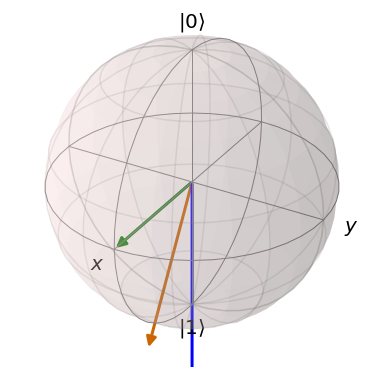

In [4]:
b = qt.Bloch()
b.clear()
b.make_sphere()

states = []
alpha = 1/np.sqrt(2)
beta = 1/np.sqrt(2)
s = np.array([alpha,beta])
state = qt.Qobj(s)
states.append(state)

rotated = rn_su2(np.pi/8, state, 0, 0, 1)
states.append(rotated)

rotated = rn_su2(np.pi/8, rotated, 0, 0, 1)
states.append(rotated)

b.add_states(states)
b.show()